<center>
<img src="https://cdn.discordapp.com/attachments/1137185853039456308/1167455358478995516/image.png">
    
##  Escuela en Español de Computación Cuántica


Autores: [Ricardo Quispe M.](https://github.com/RcrdPhysics).\
Institución: Universidad Nacional Mayor de San Marcos\
Correo: ricardo.quispe5@unmsm.edu.pe
    
Este material está sujeto a los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso gratuito para cualquier propósito no comercial.

*También puede consultar la última versión de este notebook en nuestro [repositorio](https://github.com/QuantumQuipu/QuantumScholars2023) y los videos de clase [en nuestro canal de Youtube](https://www.youtube.com/@quantumquipu-unmsm1091/streams).*
    

# <center> Día 5. Transformada de Fourier Cuántica

## Outline
1. [Intuición-1Q](#1-Intuición-1Q)
2. [Descripción Teórica](#2-Descripción-Teórica)
3. [Construcción Compuertas](#3-Construicción-Compuertas)
4. [Algunas notas sobre la forma del circuito QFT](#4-Notas)
5. [Implementación en Qiskit](#5-implementation)
6. [Ejecución de QFT en un dispositivo cuántico real](#6-RealComputer)
7. [Problemas](#7-Problemas)

    

<center>
<img src=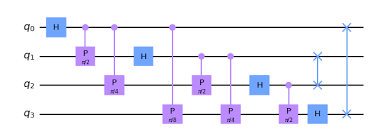>
   
<center>
<img src=https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTojEBzOH930qirXiQUSeWInrYzdEeuTWoHVw&usqp=CAU>
    


En este taller, presentamos la transformada cuántica de Fourier (QFT), derivamos el circuito y lo implementamos con Qiskit. Mostramos cómo ejecutar QFT en un simulador y un dispositivo de cinco qubits.

## 1. Intuición-1Q <a id='Intuición-1Q'></a>

La transformada cuántica de Fourier (QFT) se transforma entre dos bases, la base computacional (Z) y la base de Fourier. El H-gate es el QFT de un solo qubit, y se transforma entre los estados de base Z $|0\rangle$ y $|1\rangle$ a los estados de base X $|{+}\rangle$ y $| {-}\rangle$. De la misma manera, todos los estados multi-qubit en la base computacional tienen estados correspondientes en la base de Fourier. La QFT es simplemente la función que transforma entre estas bases.

$$
|\text{Estado en Base Computacional}\rangle \quad \xrightarrow[]{\text{QFT}} \quad |\text{Estado en base de Fourier}\rangle
$$

$$
\text{QFT}|x\rangle = |\widetilde{x}\rangle
$$

(A menudo notamos estados en la base de Fourier usando la tilde (~)).



## 2. Descripción Teórica <a id="Descripción Teórica"></a>


### <center> Hands-on-Jamboard 
    
La transformada de Fourier ocurre en muchas versiones diferentes a lo largo de la computación clásica, en áreas que van desde el procesamiento de señales hasta la compresión de datos y la teoría de la complejidad. La transformada cuántica de Fourier (QFT) es la implementación cuántica de la transformada discreta de Fourier sobre las amplitudes de una función de onda. Es parte de muchos algoritmos cuánticos, más notablemente el algoritmo de factorización de Shor y la estimación de fase cuántica.

La transformada discreta de Fourier actúa sobre un vector $(x_0, ..., x_{N-1})$ y lo asigna al vector $(y_0, ..., y_{N-1})$ según la fórmula


$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_N^{jk}$$


donde $\omega_N^{jk} = e^{2\pi i \frac{jk}{N}}$.

De manera similar, la transformada cuántica de Fourier actúa sobre un estado cuántico $\vert X\rangle = \sum_{j=0}^{N-1} x_j \vert j \rangle$ y lo asigna al estado cuántico $\vert Y\rangle = \sum_{k=0}^{N-1} y_k \vert k \rangle$ según la fórmula


$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_N^{jk}$$


con $\omega_N^{jk}$ definido como arriba. Tenga en cuenta que solo las amplitudes del estado se vieron afectadas por esta transformación.

Esto también se puede expresar como el mapa:


$$\vert j \rangle \mapsto \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}\omega_N^{jk} \vert k \rangle$$



O la matriz unitaria:

$$ U_{QFT} = \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1} \sum_{k=0}^{N-1} \omega_N^{jk} \vert k \rangle \langle j \vert$$

## 2.1. Ejemplo 1: 1-qubit QFT <a id='example1'></a>

Considere cómo el operador QFT como se definió anteriormente actúa en un solo estado de qubit $\vert\psi\rangle = \alpha \vert 0 \rangle + \beta \vert 1 \rangle$. En este caso, $x_0 = \alpha$, $x_1 = \beta$, y $N = 2$. Luego,



$$y_0 = \frac{1}{\sqrt{2}}\left(    \alpha \exp\left(2\pi i\frac{0\times0}{2}\right) + \beta \exp\left(2\pi i\frac{1\times0}{2}\right)      \right) = \frac{1}{\sqrt{2}}\left(\alpha + \beta\right)$$



y



$$y_1 = \frac{1}{\sqrt{2}}\left(    \alpha \exp\left(2\pi i\frac{0\times1}{2}\right) + \beta \exp\left(2\pi i\frac{1\times1}{2}\right)      \right) = \frac{1}{\sqrt{2}}\left(\alpha - \beta\right)$$



tal que el resultado final es el estado


$$U_{QFT}\vert\psi\rangle = \frac{1}{\sqrt{2}}(\alpha + \beta) \vert 0 \rangle + \frac{1}{\sqrt{2}}(\alpha - \beta)  \vert 1 \rangle$$



Esta operación es exactamente el resultado de aplicar el operador Hadamard ($H$) en el qubit:


$$H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$$



Si aplicamos el operador $H$ al estado $\vert\psi\rangle = \alpha \vert 0 \rangle + \beta \vert 1 \rangle$, obtenemos el nuevo estado:

$$\frac{1}{\sqrt{2}}(\alpha + \beta) \vert 0 \rangle + \frac{1}{\sqrt{2}}(\alpha - \beta)  \vert 1 \rangle 
\equiv \tilde{\alpha}\vert 0 \rangle + \tilde{\beta}\vert 1 \rangle$$


## 3. El Circuito que implementa QFT <a name="circuit"></a>


### 3.1 Hands-on-jamboard

### 3.2 QFT


Entonces, ¿cómo se ve la transformada cuántica de Fourier para $N$ más grandes? Derivemos una transformación para $N=2^n$, $QFT_N$ actuando en el estado $\vert x \rangle = \vert x_1\ldots x_n \rangle$ donde $x_1$ es el bit más significativo. Estas matemáticas están aquí para aquellos que las encuentren útiles, si tienes problemas con ellas, no te preocupes; Siempre que comprenda la intuición de la sección 2, puede continuar directamente con la siguiente sección.

$$
\begin{aligned}
QFT_N\vert x \rangle & = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1}\omega_N^{xy} \vert y \rangle 
\\
& = \frac{1}{\sqrt{N}}
\left(\vert0\rangle + e^{\frac{2\pi i}{2}x} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^2}x} \vert1\rangle\right) 
\otimes  
\ldots
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^{n-1}}x} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^n}x} \vert1\rangle\right) 
\end{aligned}
$$

## 4. Algunas notas sobre la forma del circuito QFT

El ejemplo anterior demuestra una forma muy útil de QFT para $N=2^n$. Tenga en cuenta que solo el último qubit depende de los valores de todos los demás qubits de entrada y cada bit adicional depende cada vez menos de los qubits de entrada. Esto se vuelve importante en las implementaciones físicas de QFT, donde los acoplamientos de vecinos más cercanos son más fáciles de lograr que los acoplamientos distantes entre qubits.

Además, a medida que el circuito QFT crece, se dedica una cantidad cada vez mayor de tiempo a realizar rotaciones cada vez más ligeras. Resulta que podemos ignorar las rotaciones por debajo de cierto umbral y aun así obtener resultados decentes, esto se conoce como QFT aproximado. Esto también es importante en las implementaciones físicas, ya que la reducción del número de operaciones puede reducir en gran medida la decoherencia y los posibles errores de puerta.

## 5. Implementación en Qiskit

En Qiskit, la implementación de la puerta $CROT$ utilizada en la discusión anterior es una puerta de rotación de fase controlada. Esta puerta se define en [OpenQASM](https://github.com/QISKit/openqasm) como

$$
CP(\theta) =
\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & e^{i\theta}\end{bmatrix}
$$

Por lo tanto, el mapeo de la puerta $CROT_k$ en la discusión anterior a la puerta $CP$ se encuentra a partir de la ecuación
$$
\theta = 2\pi/2^k = \pi/2^{k-1}
$$

### 5.1 Ejemplo en 3 Qubits <a id="threeqft"></a>

In [25]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

Es útil calcular el código relevante para el caso de 3 qubits antes de generalizar al caso de $n$-qubits. Primero, debemos definir nuestro circuito cuántico:

In [26]:
qc = QuantumCircuit(3)

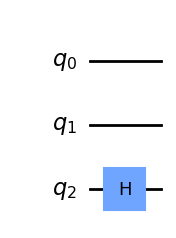

In [27]:
qc.h(2)
qc.draw()

A continuación, queremos convertir esto en un cuarto de vuelta adicional si el qubit 1 está en el estado $|1\rangle$:

          argumentos:
              theta: El ángulo de rotación.
              control_qubit: los qubits utilizados como control.
              target_qubit: los qubit(s) objetivo de la puerta.
              etiqueta: La etiqueta de cadena del puerto en el circuito.
              ctrl_estado:
                  El estado del control en decimal o como una cadena de bits (por ejemplo, '1'). normas para controlar
                  en el estado '1'.

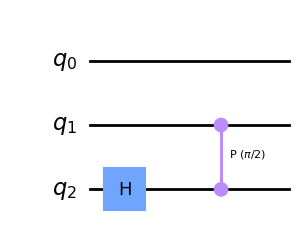

In [28]:
qc.cp(pi/2, 1, 2) # CROT from qubit 1 to qubit 2
qc.draw()

Y otro octavo turno si el qubit menos significativo (0) es $|1\rangle$:

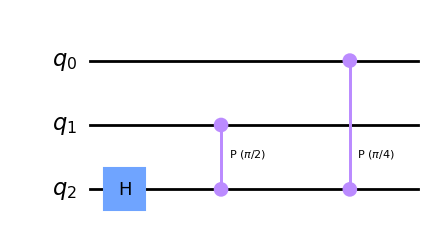

In [29]:
qc.cp(pi/4, 0, 2) # CROT from qubit 2 to qubit 0
qc.draw()

Con ese qubit solucionado, ahora podemos ignorarlo y repetir el proceso, usando la misma lógica para los qubits 0 y 1:

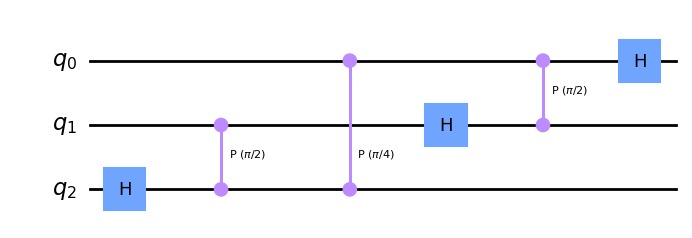

In [30]:
qc.h(1)
qc.cp(pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(0)
qc.draw()

Finalmente debemos intercambiar los qubits 0 y 2 para completar el QFT:

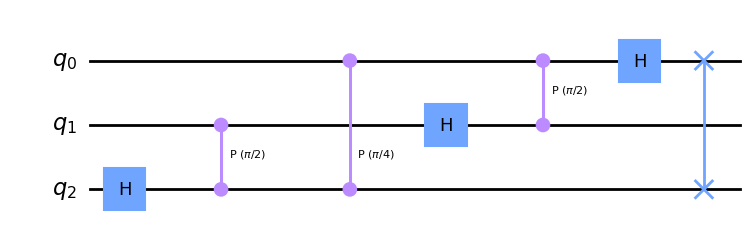

In [31]:
qc.swap(0,2)
qc.draw()

### 5.2 Función QFT general <a id="generalqft"></a>

Ahora crearemos un circuito general para el QFT en Qiskit. La creación de grandes circuitos generales como este es realmente donde brilla Qiskit.

Es más fácil construir un circuito que implemente el QFT con los qubits al revés y luego intercambiarlos; Comenzaremos creando la función que rota nuestros qubits correctamente. Comencemos como lo hicimos con el ejemplo de 3 qubits, rotando correctamente el qubit más significativo (el qubit con el índice más alto):

In [32]:
def qft_rotations(circuit, n):
    if n == 0: # Exit function if circuit is empty
        return circuit
    n -= 1 # Indexes start from 0
    circuit.h(n) # Apply the H-gate to the most significant qubit
    for qubit in range(n):
        # For each less significant qubit, we need to do a
        # smaller-angled controlled rotation: 
        circuit.cp(pi/2**(n-qubit), qubit, n)

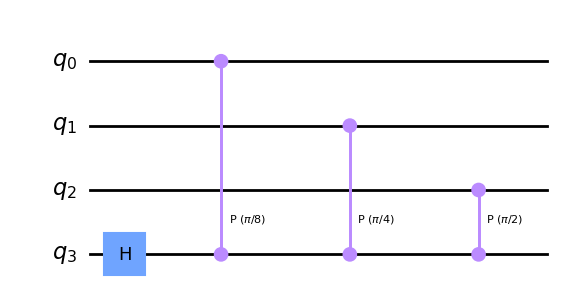

In [33]:
qc = QuantumCircuit(4)
qft_rotations(qc,4)
qc.draw()

Podemos usar el widget a continuación para ver cómo este circuito se escala con la cantidad de qubits en nuestro circuito

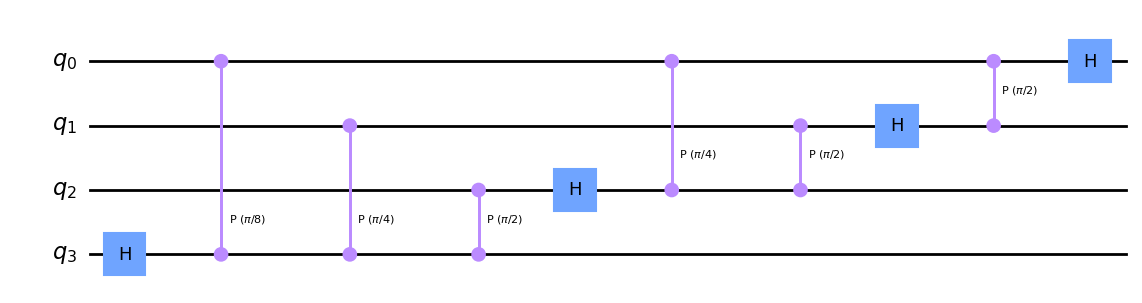

In [34]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

# Let's see how it looks:
qc = QuantumCircuit(4)
qft_rotations(qc,4)
qc.draw()

Finalmente, debemos agregar los intercambios al final de la función QFT para que coincidan con la definición de QFT. Combinaremos esto en la función final `qft()`:

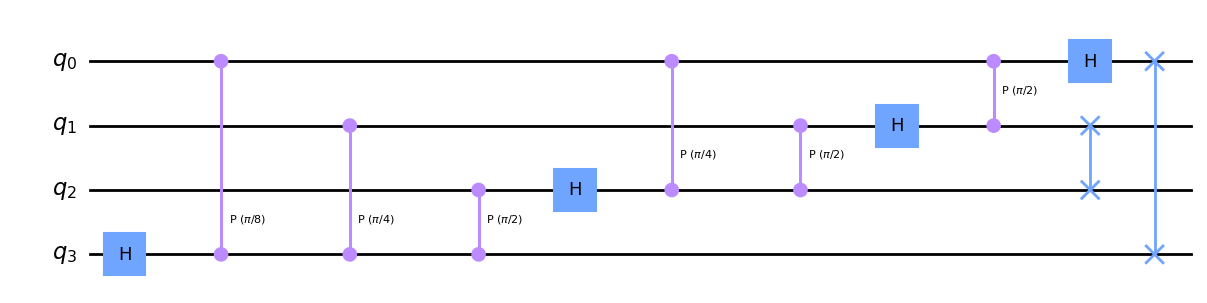

In [35]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

# Let's see how it looks:
qc = QuantumCircuit(4)
qft(qc,4)
qc.draw(output='mpl')

Finalmente, usemos nuestra función QFT y veamos el estado final de nuestros qubits:

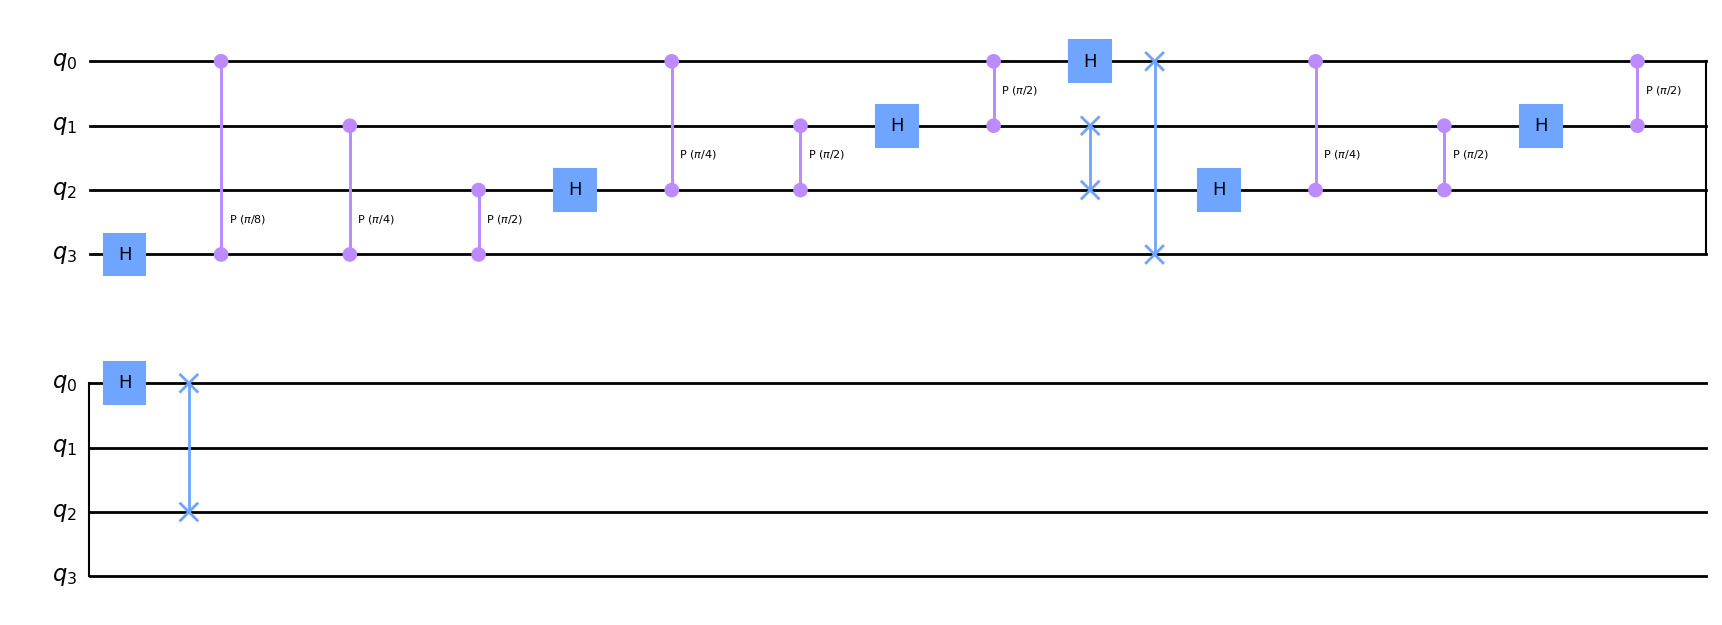

In [36]:
qft(qc,3)
qc.draw()

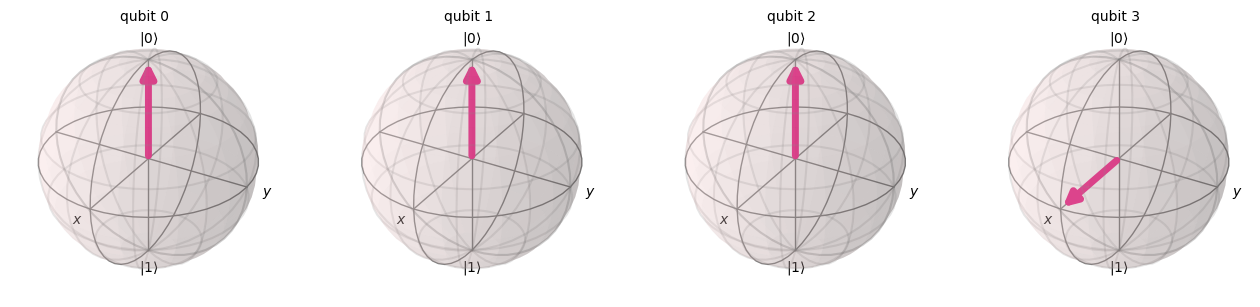

In [37]:
sim = Aer.get_backend("aer_simulator")
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

Podemos ver que la función QFT ha funcionado correctamente. En comparación con el estado $|\widetilde{0}\rangle = |{+}{+}{+}\rangle$, el qubit 0 se ha rotado $\tfrac{5}{8}$ de un giro completo, el qubit 1 por $\tfrac{10}{8}$ vueltas completas (equivalente a $\tfrac{1}{4}$ de una vuelta completa), y qubit 2 por $\tfrac{20}{8}$ vueltas completas (equivalente a $\tfrac{1}{2}$ de una vuelta completa).

### 6 Ejecución de QFT en un dispositivo cuántico real<a id="implementationdev"></a>

Si intentáramos ejecutar el circuito al final de la sección 8.2 en un dispositivo real, los resultados serían completamente aleatorios, ya que todos los qubits están en igual superposición de $|0\rangle$ y $|1\rangle$. Si queremos demostrar e investigar el funcionamiento de la QFT en hardware real, podemos crear el estado $|\widetilde{5}\rangle$ que se ve al final de la sección 8.2, ejecutar la QFT a la inversa y verificar que la salida sea la estado $|5\rangle$ como se esperaba.

En primer lugar, usemos Qiskit para revertir fácilmente nuestra operación QFT:

In [38]:
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

Ahora pongamos nuestros qubits en el estado $|\widetilde{5}\rangle$:

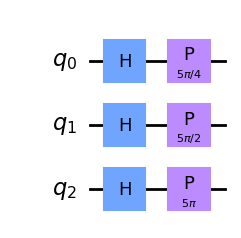

In [39]:
nqubits = 3
number = 5
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(number*pi/4,0)
qc.p(number*pi/2,1)
qc.p(number*pi,2)

qc.draw()

Y podemos ver que esto da como resultado el estado de Fourier $|\widetilde{5}\rangle$:

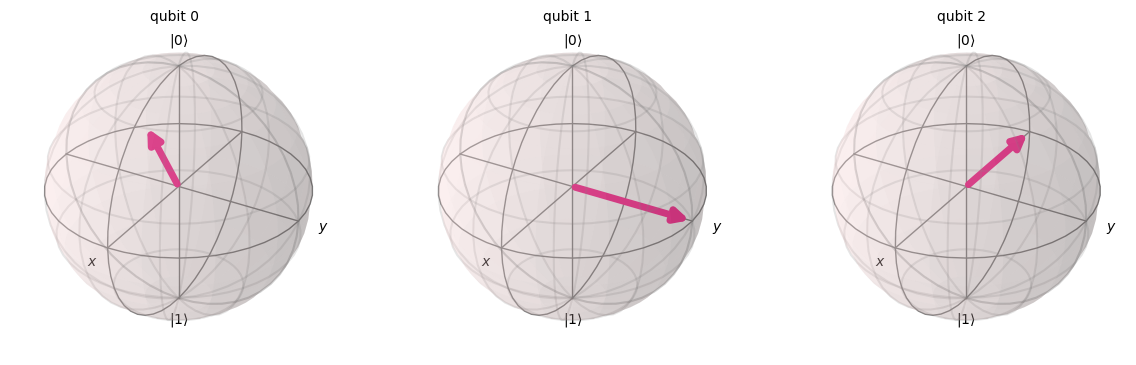

In [40]:
qc_init = qc.copy()
qc_init.save_statevector()
sim = Aer.get_backend("aer_simulator")
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

Finalmente, aplicemos nuestro QFT inverso:

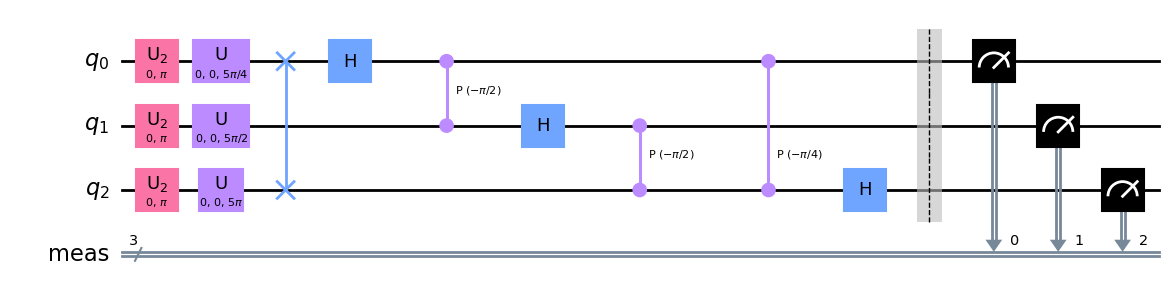

In [41]:
qc = inverse_qft(qc, nqubits)
qc.measure_all()
qc.draw()

In [42]:
# Cargue sus cuentas IBMQ guardadas y obtenga el dispositivo backend menos ocupado con menos o igual a n qubits

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= nqubits 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

/tmp/ipykernel_61/2792921059.py:3: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


least busy backend:  ibm_nairobi


In [ ]:
shots = 2048
transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_qc, shots=shots)
job_monitor(job)

Job Status: job is queued (None)

In [ ]:
counts = job.result().get_counts()
plot_histogram(counts)

Nosotros (esperamos) vemos que el resultado de mayor probabilidad es $101$.

## 7. Problemas<a id="problems"></a>

1. La implementación anterior de QFT se probó preparando el estado de Fourier $|\widetilde{5}\rangle$ para el cual $\text{QFT}^{\dagger}|\widetilde{5}\rangle= |101\rangle$. Intenta encontrar el estado $|a\rangle$ tal que $\text{QFT}^{\dagger}|a\rangle = |100\rangle$.
2. Encuentra el estado $|b\rangle$ tal que $\text{QFT}^{\dagger}|b\rangle = |011\rangle$.
3. Intente escribir la función QFT sin recursividad. Utilice el simulador unitario de Qiskit para verificar sus resultados.

## 10. Recursos útiles

* ["QFT_Qiskit"](https://learn.qiskit.org/course/ch-algorithms/quantum-fourier-transform)
* ["QFT_Community"](https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/terra/qis_adv/fourier_transform.ipynb)
+ 1. M. Nielsen and I. Chuang, Quantum Computation and Quantum Information, Cambridge Series on Information and the Natural Sciences (Cambridge University Press, Cambridge, 2000).
* https://qiskit.org/documentation/

## Donaciones
<br>
<center>
Puedes donar una vez en el siguiente enlace (Ko-Fi):

<br>
    
*Click en la imagen.*

<a href="https://ko-fi.com/rcrdphysics">
<img src="https://habrastorage.org/webt/8r/ml/xf/8rmlxfpdzukegpxa62cxlfvgkqe.png" width=20% />

</center>